###### Tool to extract usefull information from mlperf trace

In [81]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# figsize=(12, 8)
# font=10
figsize=(10, 5)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [82]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"] /1e9
            d["issue_to_done"] = args["issue_to_done"] / 1e9
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e9
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [83]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [84]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json')
df.describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


,ts,dur,issue_start_ns,complete_ns,issue_to_done
count,3.379300e+04,1.025000e+03,32768.0,3.276800e+04,32768.000000
mean,3.693691e+06,8.662966e+04,508.0,1.168306e+11,116.830606
std,2.293730e+07,2.773145e+06,0.0,6.423618e+10,64.236176
min,1.534743e+05,3.894000e+00,508.0,4.166881e+09,4.166881
25%,1.534743e+05,7.312000e+00,508.0,6.097668e+10,60.976676
50%,1.534743e+05,8.690000e+00,508.0,1.171760e+11,117.175984
75%,1.534743e+05,1.211200e+01,508.0,1.722292e+11,172.229158
max,2.253783e+08,8.878399e+07,508.0,2.252248e+11,225.224797


In [85]:
df["name"].unique()

array(['Sample', 'IssueQuery', 'QuerySamplesComplete'], dtype=object)

In [86]:
df

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,1.534743e+05,Sample,NaN,508.0,4.166881e+09,4.166881
22196,1.534743e+05,Sample,NaN,508.0,1.512787e+11,151.278733
22195,1.534743e+05,Sample,NaN,508.0,1.512787e+11,151.278733
22194,1.534743e+05,Sample,NaN,508.0,1.512787e+11,151.278733
22193,1.534743e+05,Sample,NaN,508.0,1.512787e+11,151.278733
...,...,...,...,...,...,...
33660,2.253234e+08,QuerySamplesComplete,12.199,NaN,NaN,NaN
33693,2.253425e+08,QuerySamplesComplete,14.082,NaN,NaN,NaN
33726,2.253525e+08,QuerySamplesComplete,6.659,NaN,NaN,NaN
33759,2.253676e+08,QuerySamplesComplete,6.478,NaN,NaN,NaN


In [87]:
df1 = df[df["name"].isin(["Sample"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,153474.316,Sample,NaN,508.0,4.166881e+09,4.166881
22196,153474.316,Sample,NaN,508.0,1.512787e+11,151.278733
22195,153474.316,Sample,NaN,508.0,1.512787e+11,151.278733
22194,153474.316,Sample,NaN,508.0,1.512787e+11,151.278733
22193,153474.316,Sample,NaN,508.0,1.512787e+11,151.278733
...,...,...,...,...,...,...
11073,153474.316,Sample,NaN,508.0,7.842969e+10,78.429691
11018,153474.316,Sample,NaN,508.0,7.796885e+10,77.968845
11072,153474.316,Sample,NaN,508.0,7.842969e+10,78.429691
11066,153474.316,Sample,NaN,508.0,7.842969e+10,78.429691


In [88]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
12672,153475.074,IssueQuery,8.878399e+07,NaN,NaN,NaN


In [89]:
df1 = df[df["name"].isin(["Latency"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done


In [90]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
32,4.320356e+06,QuerySamplesComplete,26.421,NaN,NaN,NaN
65,4.351081e+06,QuerySamplesComplete,17.403,NaN,NaN,NaN
98,4.366093e+06,QuerySamplesComplete,26.859,NaN,NaN,NaN
131,4.408511e+06,QuerySamplesComplete,23.789,NaN,NaN,NaN
164,4.429682e+06,QuerySamplesComplete,14.278,NaN,NaN,NaN
...,...,...,...,...,...,...
33660,2.253234e+08,QuerySamplesComplete,12.199,NaN,NaN,NaN
33693,2.253425e+08,QuerySamplesComplete,14.082,NaN,NaN,NaN
33726,2.253525e+08,QuerySamplesComplete,6.659,NaN,NaN,NaN
33759,2.253676e+08,QuerySamplesComplete,6.478,NaN,NaN,NaN


# offline scenario

In [124]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

path = "/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"
all_files = glob.glob(path + "*o.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,offline,1,1,105.414569,154.972299,154.633110,248.048357,279.524504,295.132087,307.701754,310.603773
1,resnet,none,32,1,offline,2,1,119.494996,138.093902,138.264528,219.841950,247.029899,260.684060,271.650888,274.100827
2,resnet,none,32,1,offline,4,1,129.745718,127.323859,127.456813,202.891304,227.941520,240.505602,250.529871,252.480539
3,resnet,none,32,1,offline,8,1,142.633708,116.108557,115.842571,184.635704,207.640227,219.427665,228.395334,229.686834
4,resnet,none,32,1,offline,1,2,104.721959,156.954677,157.123402,250.805648,281.899282,297.504416,309.911874,312.671042


In [125]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
dfg = df
dfg

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,offline,1,1,105.414569,154.972299,154.633110,248.048357,279.524504,295.132087,307.701754,310.603773
1,resnet,none,32,1,offline,2,1,119.494996,138.093902,138.264528,219.841950,247.029899,260.684060,271.650888,274.100827
2,resnet,none,32,1,offline,4,1,129.745718,127.323859,127.456813,202.891304,227.941520,240.505602,250.529871,252.480539
3,resnet,none,32,1,offline,8,1,142.633708,116.108557,115.842571,184.635704,207.640227,219.427665,228.395334,229.686834
4,resnet,none,32,1,offline,1,2,104.721959,156.954677,157.123402,250.805648,281.899282,297.504416,309.911874,312.671042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,resnet,cpumemory,32,32,offline,8,9,187.577736,86.491157,86.619093,137.576191,154.667196,163.293379,170.227503,173.136997
486,resnet,cpumemory,32,32,offline,1,10,177.034305,90.375897,90.310657,144.693863,162.759444,171.814448,178.970071,182.349987
487,resnet,cpumemory,32,32,offline,2,10,178.450735,89.442029,89.320036,142.974671,160.902772,169.823493,176.988087,181.545820
488,resnet,cpumemory,32,32,offline,4,10,187.103399,85.961197,85.949285,137.037535,154.066762,162.540068,169.581616,173.537673


In [126]:
df["k8senv"].unique()

array(['none', 'baseline', 'cpumemory'], dtype=object)

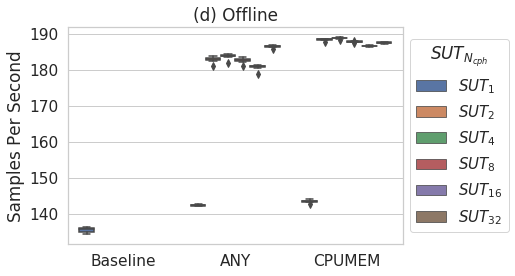

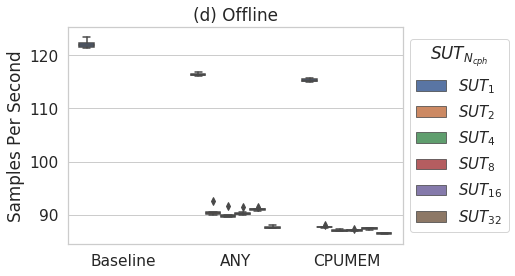

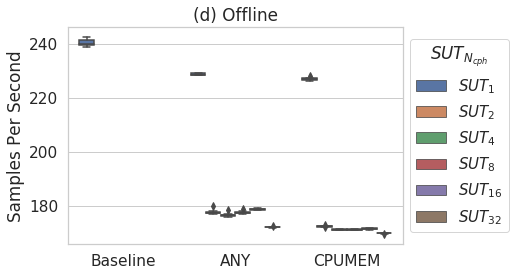

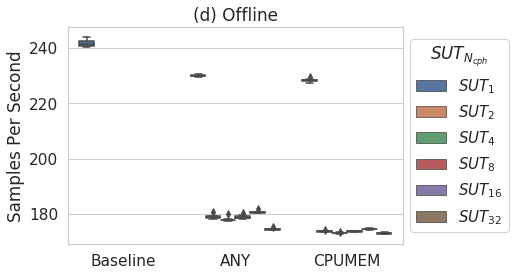

In [128]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']

for x in ['qps','mean','p99','p999']:
    for cbatch in [8]:
        for model_name in ['resnet']:
            list_traces = []
            for env in ['baseline','none','cpumemory']:
    #             for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & \
    #                             (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']==env))]
    #             print(dfg_bench['k8senv'])
                list_traces.append(dfg_bench)
            dfall = pd.concat(list_traces, axis=0, ignore_index=True)
            ax = sns.boxplot(x = dfall['k8senv'],
                        y = dfall[x],
                        hue = dfall['numctn'])
            handles, _ = ax.get_legend_handles_labels()
            ax.legend(handles, legend, prop={'size': 15}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5))
            ax.set_xticklabels(["Baseline","ANY","CPUMEM"])
            plt.xlabel("")
            plt.ylabel("Samples Per Second")
            plt.title("(d) Offline")
            plt.savefig('o-metric'+x+'.pdf',bbox_inches='tight')  
            plt.show()


In [138]:
df=dfg

In [151]:
from numpy import percentile, median, std

l_gb = ['benchmark', 'k8senv', 'sbatch','numctn','cscenario','cbatch']

df_results = []

for model_name in df['cbatch'].unique():
       df_bench = df[(df['cbatch']==model_name)] # everybenchmark
       for senario in df_bench.k8senv.unique():
            df_senario = df_bench[df_bench.k8senv == senario]
            df_base=df_senario[df_senario.numctn == 1]
            base=median(df_base['mean'])
            print(base)
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_median' : median(x['mean']),
                  'increment' : (median(x['mean'])-base)/base,
              })).reset_index()
            df_results.append(df_senario)

156.9414602596143
156.52339793368358
138.27520557318334
137.455779057891
127.08016450298095
126.96798864985797
116.37510810109204
121.89502217580687
115.25401418194691


In [152]:
df_results = pd.concat(df_results, axis=0)
df_results

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,model_time_median,increment
0,resnet,none,32,1,offline,1,156.941460,0.000000
1,resnet,none,32,2,offline,1,109.261463,-0.303808
2,resnet,none,32,4,offline,1,106.135319,-0.323727
3,resnet,none,32,8,offline,1,105.636880,-0.326903
4,resnet,none,32,16,offline,1,99.522564,-0.365862
5,resnet,none,32,32,offline,1,92.557130,-0.410244
0,resnet,cpumemory,32,1,offline,1,156.523398,0.000000
1,resnet,cpumemory,32,2,offline,1,102.463386,-0.345380
2,resnet,cpumemory,32,4,offline,1,98.087875,-0.373334
3,resnet,cpumemory,32,8,offline,1,97.303238,-0.378347


In [157]:
from numpy import percentile, median, std

l_gb = ['benchmark', 'k8senv', 'sbatch','numctn','cscenario','cbatch','model_time_median','increment']

df_results1 = []

for ctn in df_results.numctn.unique():
    df_senario = df_results[(df_results.numctn == ctn) &(df_results.cbatch == 4)]
    df_base=df_senario[df_senario.k8senv == 'none']
    base=float(df_base['model_time_median'])
    print(base)
    df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
          'affinity' : (float(x['model_time_median'])-base)/base,
      })).reset_index()
    df_results1.append(df_senario)

df_results1 = pd.concat(df_results1, axis=0)
df_results1

127.08016450298095
95.01240433321392
94.38092406778978
94.37518457080583
92.43669184703296
88.28271898235755


,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,model_time_median,increment,affinity
0,resnet,none,32,1,offline,4,127.080165,0.000000,0.000000
1,resnet,cpumemory,32,1,offline,4,126.967989,0.000000,-0.000883
0,resnet,none,32,2,offline,4,95.012404,-0.252343,0.000000
1,resnet,cpumemory,32,2,offline,4,91.837037,-0.276691,-0.033421
0,resnet,none,32,4,offline,4,94.380924,-0.257312,0.000000
1,resnet,cpumemory,32,4,offline,4,90.748097,-0.285268,-0.038491
0,resnet,none,32,8,offline,4,94.375185,-0.257357,0.000000
1,resnet,cpumemory,32,8,offline,4,90.822328,-0.284683,-0.037646
0,resnet,none,32,16,offline,4,92.436692,-0.272611,0.000000
1,resnet,cpumemory,32,16,offline,4,87.094841,-0.314041,-0.057789


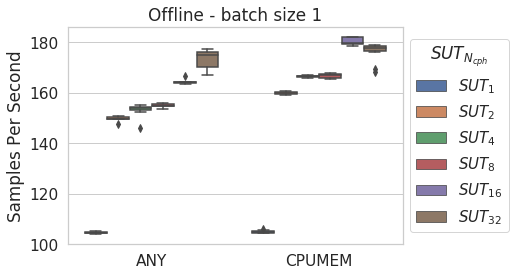

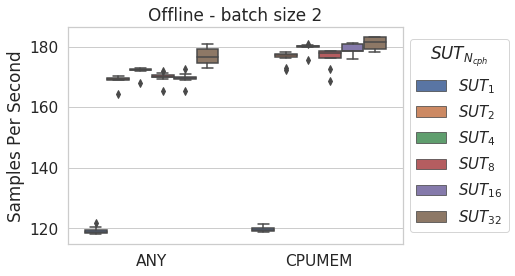

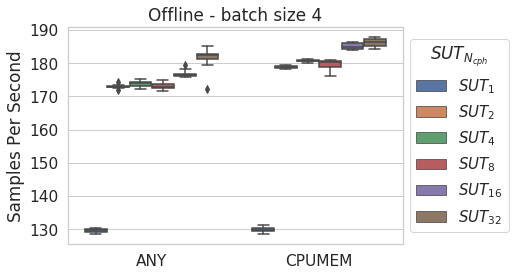

In [154]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']

for x in ['qps']:
    for cbatch in [1,2,4]:
        for model_name in ['resnet']:
            list_traces = []
            for env in ['baseline','none','cpumemory']:
    #             for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & \
    #                             (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']==env))]
    #             print(dfg_bench['k8senv'])
                list_traces.append(dfg_bench)
            dfall = pd.concat(list_traces, axis=0, ignore_index=True)
            ax = sns.boxplot(x = dfall['k8senv'],
                        y = dfall[x],
                        hue = dfall['numctn'])
            handles, _ = ax.get_legend_handles_labels()
            ax.legend(handles, legend, prop={'size': 15}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5))
            ax.set_xticklabels(["ANY","CPUMEM"])
            plt.xlabel("")
            plt.ylabel("Samples Per Second")
            plt.title("Offline - batch size "+str(cbatch))
            plt.savefig('o-metric'+str(cbatch)+'.pdf',bbox_inches='tight')  
            plt.show()


In [95]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

for x in ['qps','mean','p99']:
    for cbatch in [16,32]:
        for model_name in ['resnet']:
            list_traces = []
            for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']=='none') |\
                             (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
#                 print(dfg_bench)


                #data
                trace = go.Scatter(
                    name="ctn"+str(numctn),
                    x=[ 'none','cpumem','cpu'],
                    y= dfg_bench[x].values.tolist(),
        #             error_y = dict(type='data', array=df1_bench['model_time_std'].values.tolist()),
                    opacity=0.7,
                    mode='markers'
                )
                list_traces.append(trace)



            #layout
            layout = go.Layout(
                title={
                    'text': "exp18(cpu32)= inter16,intra32 -> inter1,intra2; restapi=32" ,
                    'y':0.85,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                width=1000,
                height=460,
                xaxis=dict(
                    title= "scenarios",
                    tickvals=[ 'none','cpumem','cpu'],
                    titlefont=dict(
                        size=10,
                        color='rgb(107, 107, 107)'
                    ),
                    tickfont=dict(
                        size=10,
                        color='rgb(107, 107, 107)'
                    )
                ),
                yaxis=dict(
                    title= x+"batch"+str(cbatch),
                    automargin=True,
                    titlefont=dict(
                        size=25,
                        color='rgb(107, 107, 107)'
                    ),
                    tickfont=dict(
                        size=25,
                        color='rgb(107, 107, 107)'
                    ),    
                ),
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(255, 255, 255, 0)',
                    bordercolor='rgba(255, 255, 255, 0)',
                    font = dict( size = 28)
                ),
                barmode='group',
                bargap=0.15,
                bargroupgap=0.08
        #         legend_orientation="h"
            )

        data = list_traces
        fig = go.Figure(data=data, layout=layout)
        fig.update_layout(legend_orientation="h")
        fig.show()    

    #     fig.write_image(path + model_name + k8senv +'.pdf')

In [96]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
SCEN=[
    'none-resnet-1-32-O-8-1',
      'none-resnet-2-32-O-8-1',
            'none-resnet-4-32-O-8-1',
           'none-resnet-8-32-O-8-1',
      'none-resnet-16-32-O-8-1',
      'none-resnet-32-32-O-8-1'
]
x=0
for add in SCEN:
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["IssueQuery"])]
    print(df1)
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('IssueQuery duration (usec)');
#     x=x+1
#     plt.show()

# df1['delta'].describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-1-32-O-8-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts        name           dur  issue_start_ns  complete_ns  \
25344  148497.721  IssueQuery  1.586266e+08             NaN          NaN   

       issue_to_done  
25344            NaN  
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-2-32-O-8-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
             ts        name           dur  issue_start_ns  complete_ns  \
25344  184993.3  IssueQuery  1.258991e+08             NaN          NaN   

       issue_to_done  
25344            NaN  
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-4-32-O-8-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts        name           dur  issue_start_ns  complete_ns  \
25344  176809.064  I

In [97]:
# # for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

In [99]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for hardware in ['cpumemory']:
    for batch in ['1','2','4','8','16','32']:
        SCEN=[
            hardware+'-resnet-1-32-O-'+batch+'-10',
              hardware+'-resnet-2-32-O-'+batch+'-10',
                    hardware+'-resnet-4-32-O-'+batch+'-10',
                   hardware+'-resnet-8-32-O-'+batch+'-10',
              hardware+'-resnet-16-32-O-'+batch+'-10',
              hardware+'-resnet-32-32-O-'+batch+'-10'
        ]
        x=0
        for add in SCEN:
            df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
            df1 = df[df["name"].isin(["QuerySamplesComplete"])]
            print(len(df1))
            print(max(df1['dur']))
            print(np.median(df1['dur']))
            print(np.mean(df1['dur']))
        #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
        #     ax.set_title('Inference time (usec)');
        #     x = x+1
        #     plt.show()

            # Draw the density plot
            sns.distplot(df1['dur'], hist = False, kde = True,
                         kde_kws = {'linewidth': 3},
                         label = SCEN[x])
            x=x+1

        # Plot formatting
        plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
        plt.title('Inference time (usec) -- batch'+str(batch))
        plt.xlabel('time (usec)')
        plt.ylabel('Density')
        plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-1-32-O-1-10/mlperf_log_trace.json'

In [100]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
legend=["baseline","ANY-1ctn","ANY-2ctn","ANY-4ctn","ANY-8ctn","ANY-16ctn","ANY-32ctn"]

for hardware in ['cpumemory']:
    for batch in ['1','2','4','8','16','32']:
    # for batch in ['16','32']:
        SCEN=[
                hardware+'-resnet-1-32-O-'+batch+'-10',
                  hardware+'-resnet-2-32-O-'+batch+'-10',
                        hardware+'-resnet-4-32-O-'+batch+'-10',
                       hardware+'-resnet-8-32-O-'+batch+'-10',
                  hardware+'-resnet-16-32-O-'+batch+'-10',
                  hardware+'-resnet-32-32-O-'+batch+'-10'
            ]
        x=0
        for add in SCEN:
            df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
            df1 = df[df["name"].isin(["Sample"])]
    #         print(max(df1['dur']))
    #         print(np.median(df1['dur']))
    #         print(np.mean(df1['dur']))
        #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
        #     ax.set_title('Inference time (usec)');
        #     x = x+1
        #     plt.show()

            # Draw the density plot
            sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                         kde_kws = {'linewidth': 3},
                         label = SCEN[x])
            x=x+1

        # Plot formatting
        plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
        plt.title('Inference time (usec) -- batch'+str(batch))
        plt.xlabel('time (usec)')
        plt.ylabel('Density')
        plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-1-32-O-1-10/mlperf_log_trace.json'

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-16-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-32-32-O-8-

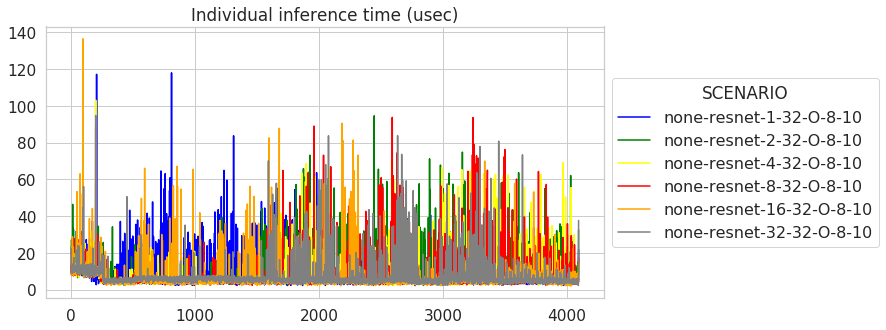

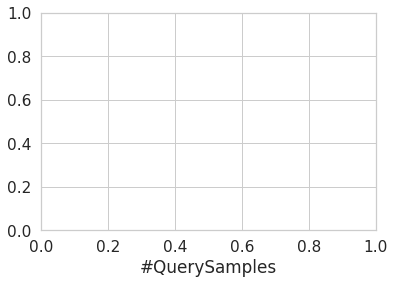

In [102]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['8']:
# for batch in ['1','2','4','8','16','32']:
    SCEN=[
        'none-resnet-1-32-O-'+batch+'-10',
          'none-resnet-2-32-O-'+batch+'-10',
                'none-resnet-4-32-O-'+batch+'-10',
               'none-resnet-8-32-O-'+batch+'-10',
          'none-resnet-16-32-O-'+batch+'-10',
          'none-resnet-32-32-O-'+batch+'-10'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["QuerySamplesComplete"])]
        print(len(df1))
#         df1.sort_values("dur",inplace=True)
        df1.reset_index(drop=True,inplace=True)
#         df1.sort_index(inplace=True)
#         df1.reset_index(drop=True,inplace=True)
        
        ax = df1['dur'].plot(figsize=figsize, color=color[x],label = SCEN[x])
        ax.set_title('Individual inference time (usec)');
#         ax.set(xlim=(0, 256))
#         ax.set(ylim=(0, 10))
        x=x+1
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.show()
    plt.xlabel('#QuerySamples')

In [132]:
df1 = df[df["name"].isin(["Sample"])]
len(df1)

32768

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-O-8-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-16-32-O-8-10/mlperf_log_trac

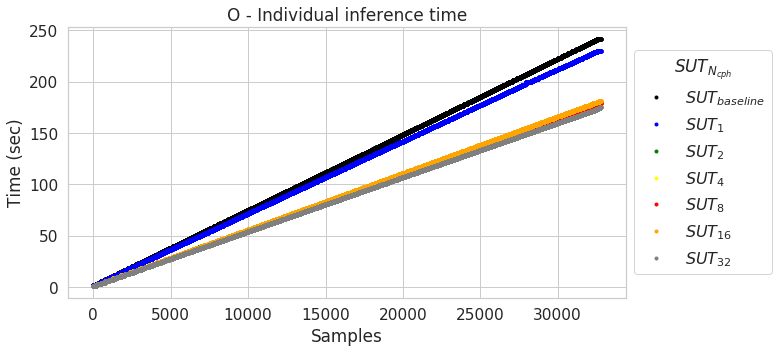

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-O-8-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-16-

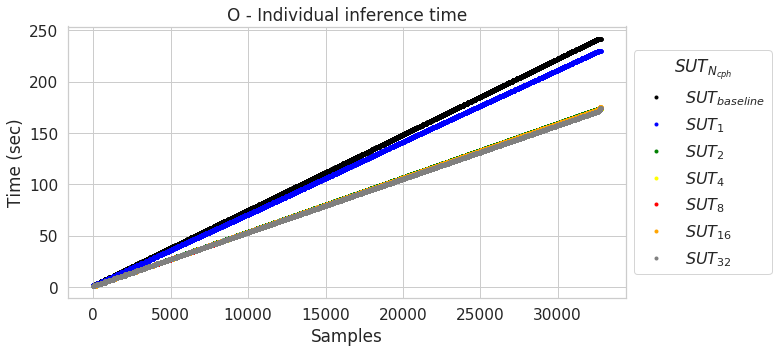

In [137]:
BINS=12
color=["black","blue","green","yellow","red","orange","grey"]
legend=['$SUT_{baseline}$','$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for hardware in ['none','cpumemory']:
#     for batch in ['1','2','4','8','16','32']:
    for batch in ['8']:
        SCEN=[
                hardware+'-resnet-1-32-O-'+batch+'-10',
                  hardware+'-resnet-2-32-O-'+batch+'-10',
                        hardware+'-resnet-4-32-O-'+batch+'-10',
                       hardware+'-resnet-8-32-O-'+batch+'-10',
                  hardware+'-resnet-16-32-O-'+batch+'-10',
                  hardware+'-resnet-32-32-O-'+batch+'-10'
            ]
        x=0
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-O-8-1/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        df1.sort_index(inplace=True)
        df1.reset_index(drop=True,inplace=True)
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x],marker='.', linestyle='none')
    #     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
        x=x+1
        for add in SCEN:
            df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
            df1 = df[df["name"].isin(["Sample"])]
    #         print(df1)
    #         print(len(df1))

    #         df1.sort_values("issue_to_done",inplace=True)
    #         df1.reset_index(drop=True,inplace=True)

            df1.sort_index(inplace=True)
            df1.reset_index(drop=True,inplace=True)

    #         print(df2)
    #         print(len(df1))
            ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x],marker='.', linestyle='none')
            ax.set_title('Individual inference time (sec)');
    #         ax.set(ylim=(0, 3))
#             ax.set(xlim=(30000, 32768))
            x=x+1
        plt.legend(prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
        plt.title('O - Individual inference time')
        plt.xlabel('Samples')
        plt.ylabel('Time (sec)')
        plt.savefig('o-itd'+hardware+'.png',bbox_inches='tight')  
        plt.show()
#         plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
#         plt.show()
#         plt.xlabel('#QuerySamples')

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-O-1-10/mlperf_log_trace.json'

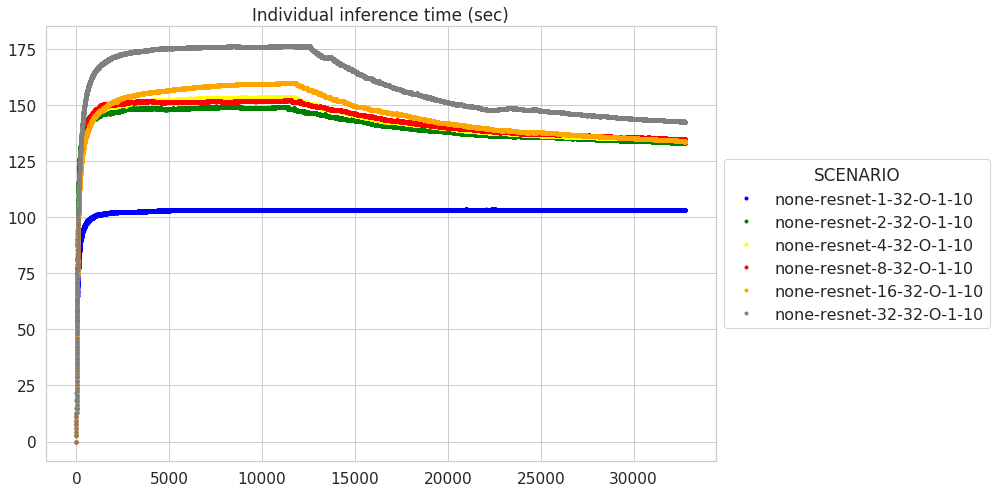

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-O-2-10/mlperf_log_trace.json'

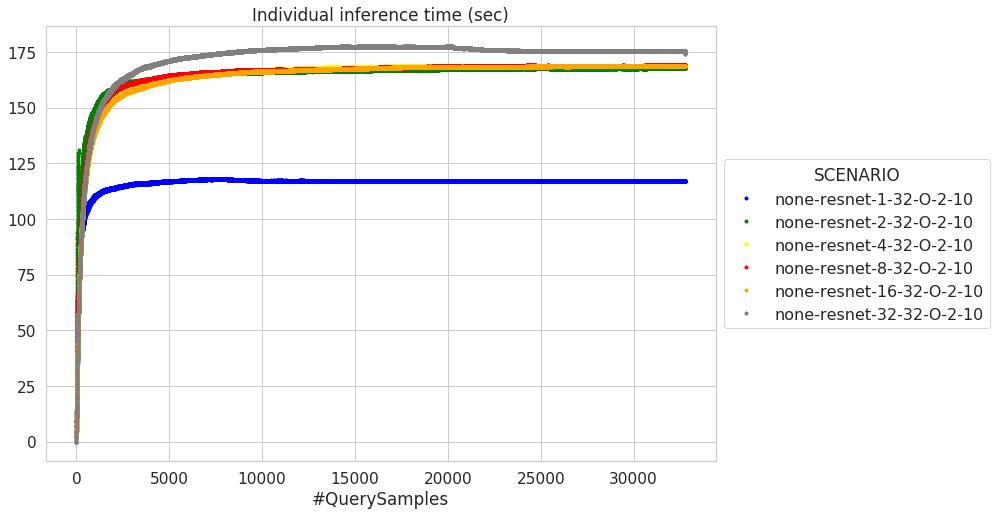

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-O-4-10/mlperf_log_trace.json'

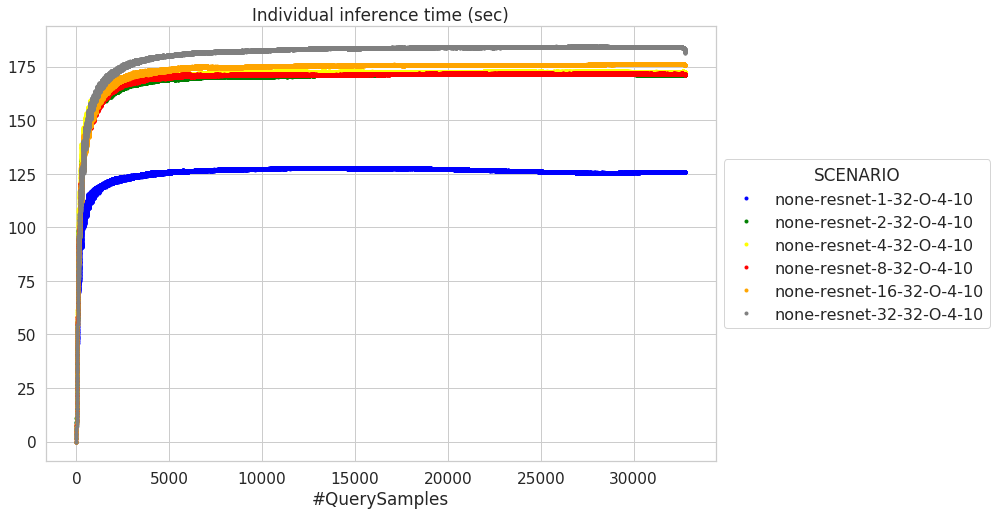

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-O-8-10/mlperf_log_trace.json'

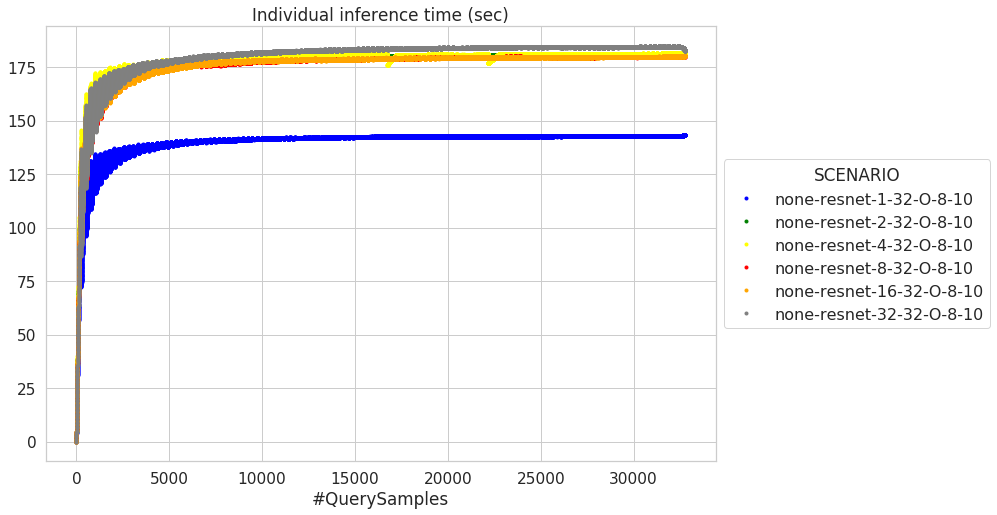

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-O-16-10/mlperf_log_trace

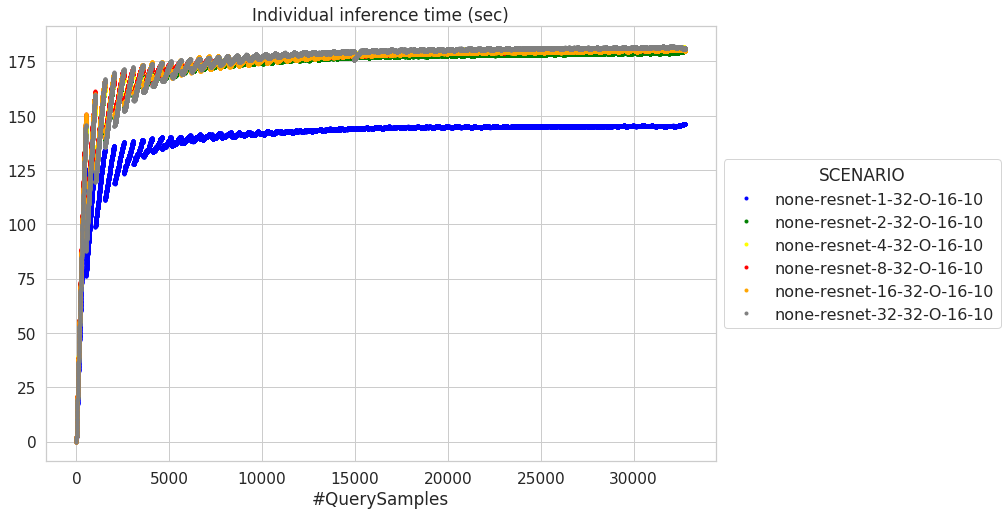

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-O-32-10/mlperf_log_trace

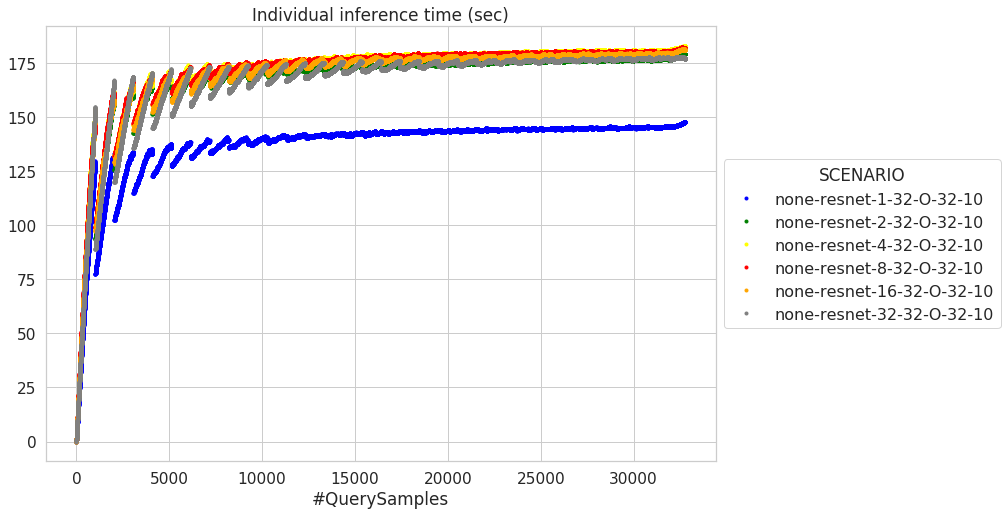

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-32-32

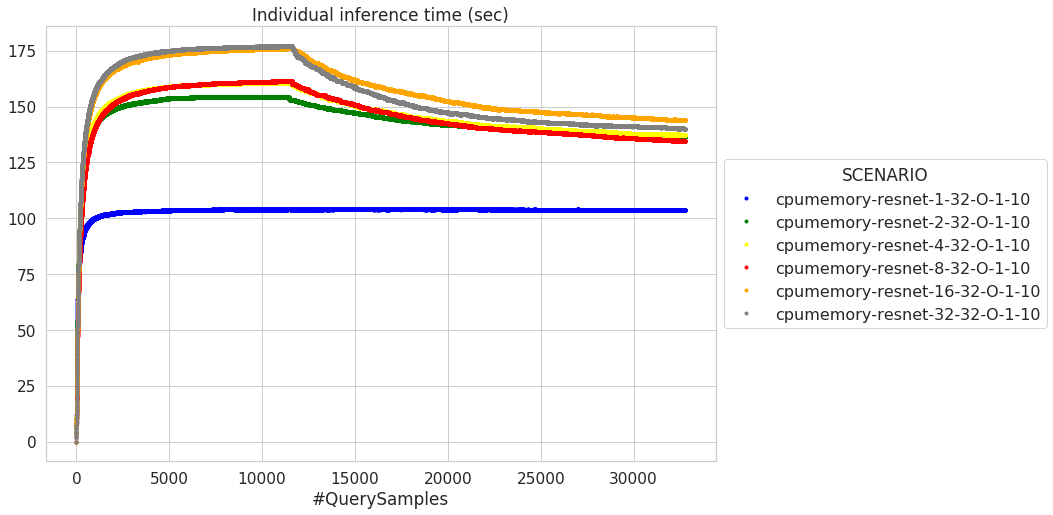

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-32-32

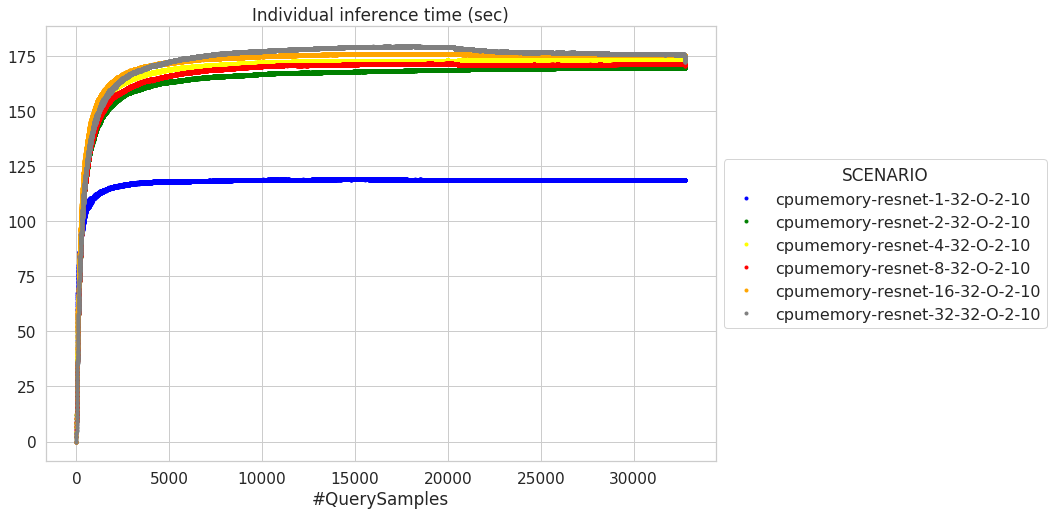

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-32-32

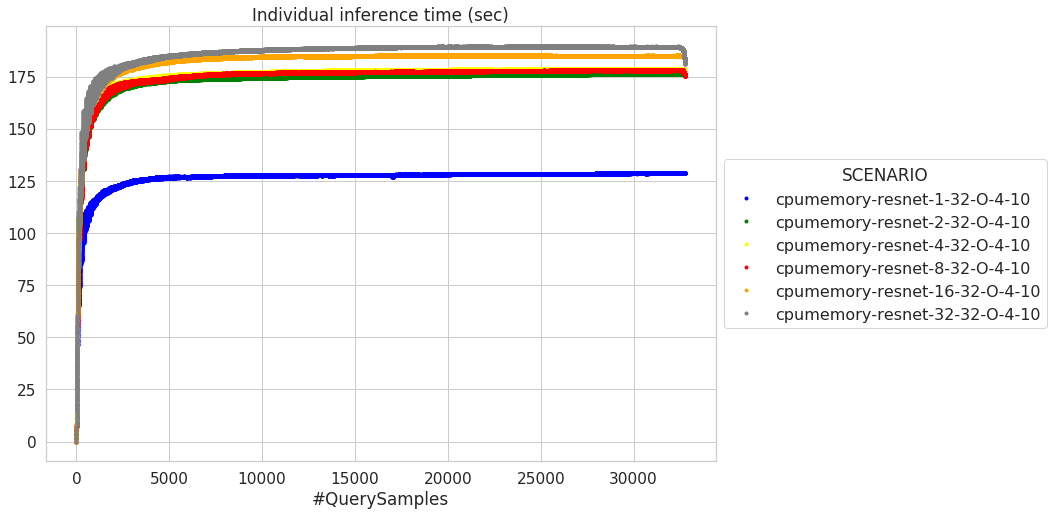

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-32-32

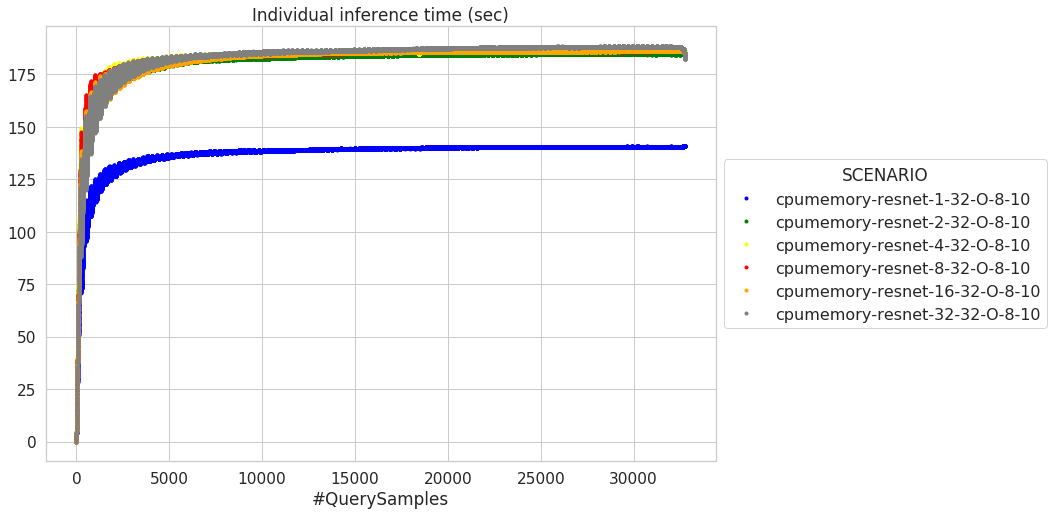

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-

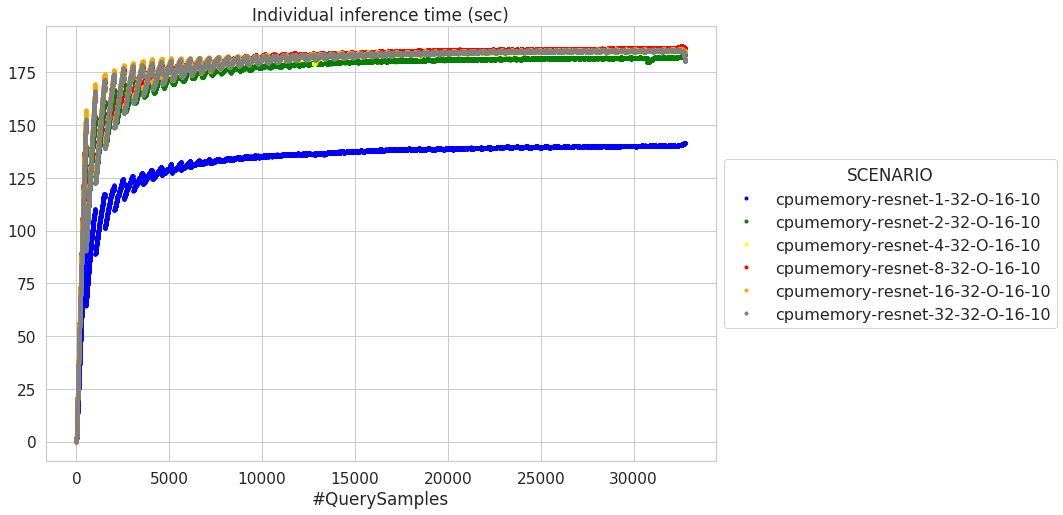

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-

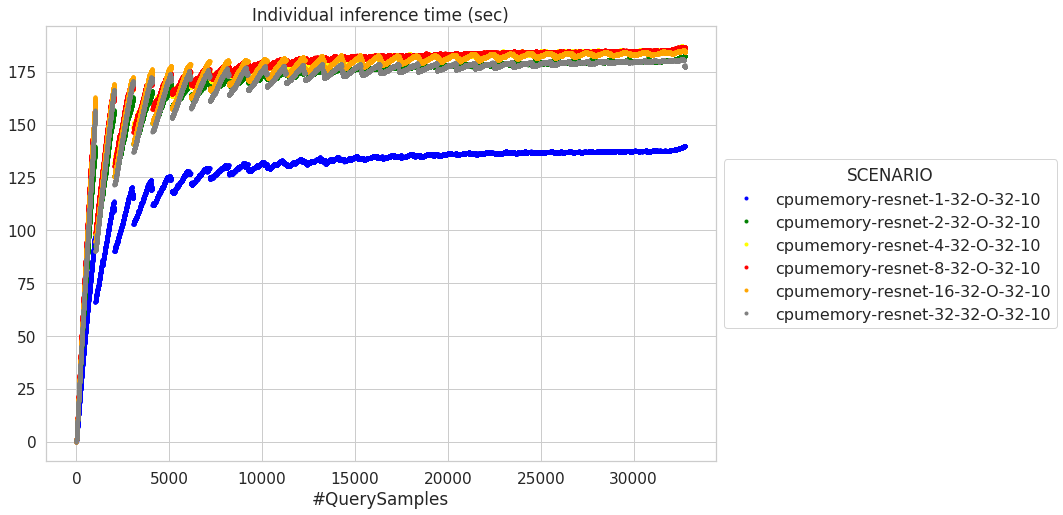

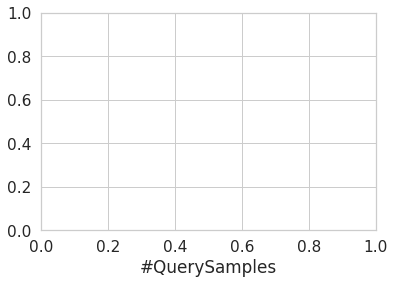

In [192]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for hardware in ['none','cpumemory']:
    for batch in ['1','2','4','8','16','32']:
    # for batch in ['16','32']:
        SCEN=[
                hardware+'-resnet-1-32-O-'+batch+'-10',
                  hardware+'-resnet-2-32-O-'+batch+'-10',
                        hardware+'-resnet-4-32-O-'+batch+'-10',
                       hardware+'-resnet-8-32-O-'+batch+'-10',
                  hardware+'-resnet-16-32-O-'+batch+'-10',
                  hardware+'-resnet-32-32-O-'+batch+'-10'
            ]
        x=0
        for add in SCEN:
            df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
            df1 = df[df["name"].isin(["Sample"])]
    #         print(df1)
    #         print(len(df1))

    #         df1.sort_values("issue_to_done",inplace=True)
    #         df1.reset_index(drop=True,inplace=True)

            df1.sort_index(inplace=True)
            df1.reset_index(inplace=True)
            df1.reset_index(inplace=True)
            df1["level_0"] = df1["level_0"] / df1['issue_to_done']

    #         print(df2)
    #         print(len(df1))
            ax = df1['level_0'].plot(figsize=figsize, color=color[x],label = SCEN[x],marker='.', linestyle='none')
            ax.set_title('Individual inference time (sec)');
    #         ax.set(ylim=(0, 3))
#             ax.set(xlim=(30000, 32768))
            x=x+1
        plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
        plt.show()
        plt.xlabel('#QuerySamples')

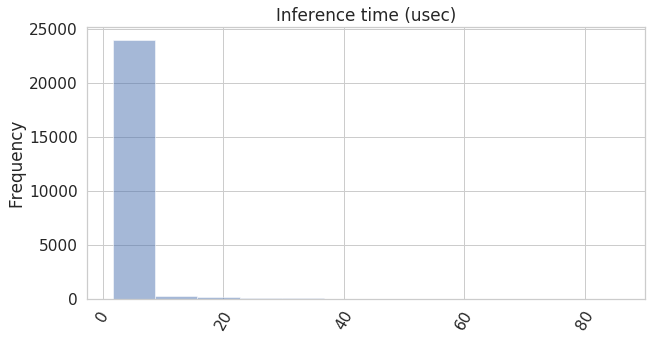

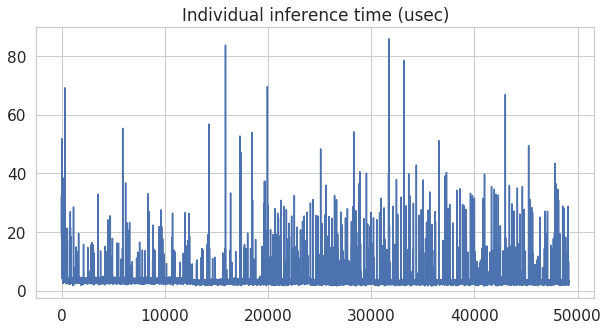

In [312]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['dur'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

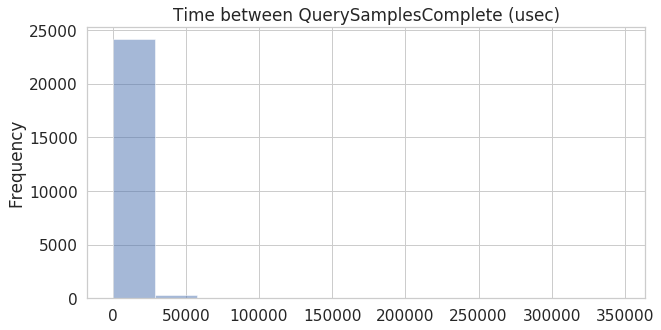

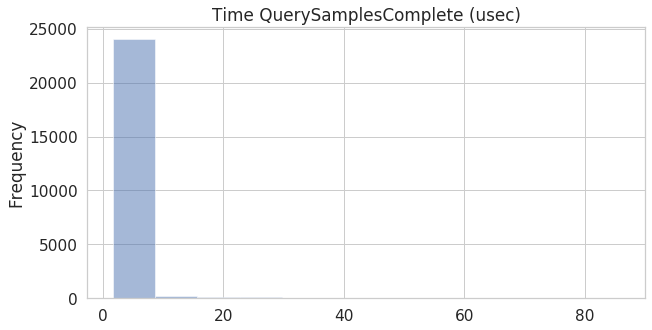

In [313]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');